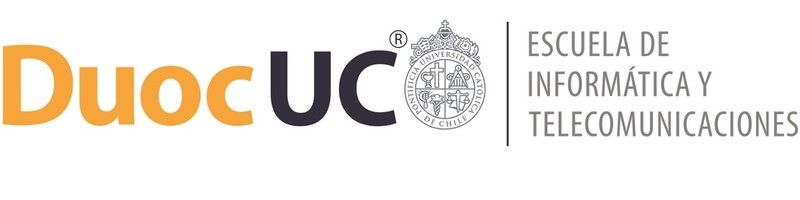

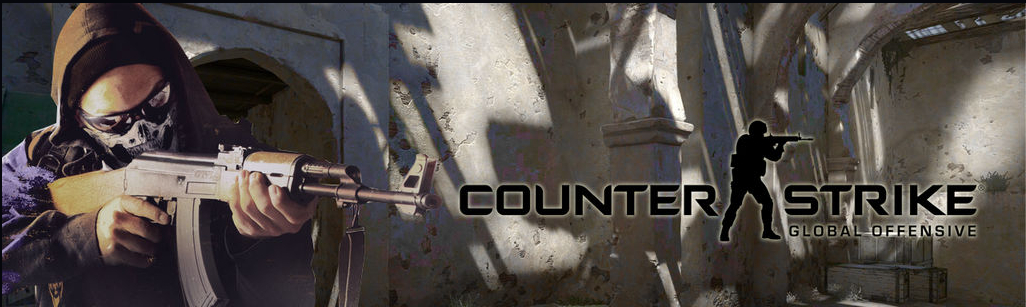

# Informe Técnico - Examen Transversal: Caso Counter Strike


Integrantes:
*
*

Docente:     

Sección: MLY0100 -

# Caso Fundamentos de Machine Learning

CONTEXTO CASO

Valve, los ha contactado como equipo de análisis de datos y modelado de Machine Learning para analizar y realizar modelos predictivos sobre los datos.

En cada partida de Counter Strike: GO dos equipos de 5 jugadores (denominados terroristas y contra-terroristas) se enfrentan.


El objetivo del equipo terrorista es plantar una bomba con timer de 45 segundos en uno de dos sitios específicos dentro de un mapa. Por otro lado, el objetivo del equipo contra-terrorista es evitar que la bomba sea plantada o desactivarla antes de que esta explote cuando ya ha sido plantada. Los datos a utilizar corresponden a sobre 7000 partidas del juego (con un máximo de 10 jugadores c/u)  


Los datos han sido extraídos de replays, los cuales son archivos propietarios con la información de cada una de las acciones realizadas por cada jugador dentro de una partida. Los replays han sido extraídos de la red utilizando un scrapper y pre-procesados utilizando un script.  



En este caso, la data corresponde a un archivo CSV con 79.157 filas, cada una correspondiente a un jugador dentro de una partida. El archivo contiene 29 columnas correspondientes a variables que describen las acciones del jugador dentro del juego.


$$
\begin{aligned}
&\begin{array}{cccc}
\hline \hline \text { Dato } & \text { Descripción } \\
\hline Map & \text {Nombre  del Mapa donde se jugó la partida}  \\
\hline \text{ Team} & \text { Nombre de equipo al que pertenece el jugador} \\
\hline \text{ InternalTeamId} & \text { Identificador del equipo al que pertenece el jugador.} \\
\hline \text{ MatchId} & \text { Identificador de la partida.} \\
\hline \text{ RoundId} & \text { Identificador de la ronda (los equipos se enfrentan en rondas de 5 partidas seguidas)} \\
\hline \text{ MatchWinner} & \text { Indica si el jugador ganó o no la partida.} \\
\hline \text{ RoundWinner} & \text { Indica si el jugador ganó o no la ronda analizada.} \\
\hline \text{ Survived} & \text { Indica si el jugador sobrevivió o no a la partida (sobrevivir no es sinónimo de ganar).} \\
\hline \text{ AbnormalMatch} & \text { Indica si la partida del jugador tuvo un error por conexión de red} \\
\hline \text{ TimeAlive} & \text { Indica el tiempo en segundos que el jugador estuvo vivo durante el juego} \\
\hline \text{ TravelledDistance} & \text { Distancia viajada por el jugador durante la partida.} \\
\hline \text{ RLethalGrenadesThrown/RNonLethalGrenadesThrown} & \text { Cantidad de granadas lanzadas, categorizadas en letales y no-letales.} \\
\hline \text{ PrimaryXXXX} & \text { Porcentaje de uso arma clasificada como primaria. Categorizada en AssaultRifle, SniperRifle, SMG, Heavy y Pistol.} \\
\hline \text{ [Match|Round] Assists} & \text { Cantidad de asistencias efectuadas por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] Kills} & \text { Cantidad de kills efectuados por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] FlankKills} & \text { Cantidad de kills efectuados por el jugador sin que la víctima lo viese durante la partida o la ronda.} \\
\hline \text{ [Match|Round] HeadShots} & \text { Cantidad de kills efectuados por el jugador a través de un tiro en la cabeza durante la partida o la ronda.} \\
\hline \text{ RoundStartingEquipmentValue} & \text { Valor del equipamiento llevado por el jugador al inicio de la ronda.} \\
\hline \text{ TeamStartingEquipmentValue} & \text { Valor promedio del equipamiento llevado por el equipo del jugador al inicio de la ronda.} \\
\end{array}
\end{aligned}
$$

## Fase 1: Business Understanding

In [ ]:
# Insertar cuantos bloques de código y markdown consideren necesarios

# Se recomienda investigar sobre el contexto de negocio, sobre los datos, uso de
# los campos en estadísticas de juegos, ver en qué se relacionan los contenidos
# revisados en la asignatura con lo planteado como caso de estudio.
# Plantear hipótesis del negocio posibles para objetivos de tareas de regresión y de clasificación

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Anexo ET_demo_round_traces_2022.csv to Anexo ET_demo_round_traces_2022.csv


In [13]:
# Importar la librería pandas, que es muy utilizada para el análisis y manejo de datos en Python
import pandas as pd

# Leer el archivo CSV llamado "Anexo ET_demo_round_traces_2022.csv"
# El separador de los datos en este archivo es el punto y coma (;)
# Esto cargará el contenido del CSV en un DataFrame llamado "df"
df = pd.read_csv("Anexo ET_demo_round_traces_2022.csv", sep=';')

# Mostrar las primeras 5 filas del DataFrame para revisar que se cargaron correctamente los datos
df.head()


<ipython-input-13-7d6fd6ee729e>:7: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Anexo ET_demo_round_traces_2022.csv", sep=';')


,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,600,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,750,4400,0,0,0,0
1,601,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,800,4400,0,0,0,0
2,602,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,1000,4400,0,0,0,0
3,603,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,850,4400,0,0,0,0
4,604,de_inferno,Terrorist,1,4,1,False,True,True,False,...,0,0,0,0,1000,4400,0,0,0,0


In [14]:
# ------------------------------------------------------
# Importación de librerías necesarias para el análisis de datos y visualización
# ------------------------------------------------------

import pandas as pd        # Manejo de datos en estructuras tipo DataFrame
import numpy as np         # Operaciones numéricas
import matplotlib.pyplot as plt  # Creación de gráficos
import seaborn as sns      # Gráficos estadísticos atractivos

# ------------------------------------------------------
# Configuración de estilos para gráficos
# ------------------------------------------------------

sns.set(style='whitegrid')  # Estilo de fondo blanco con cuadrícula para gráficos

# Habilitar que los gráficos de matplotlib se muestren directamente en el notebook
# (Ojo: este comando solo funciona en Jupyter Notebooks o Google Colab)
%matplotlib inline

# ------------------------------------------------------
# Carga del Dataset
# ------------------------------------------------------

# Leer el archivo CSV llamado "Anexo ET_demo_round_traces_2022.csv"
# El separador de los datos es el punto y coma (;)
df = pd.read_csv("Anexo ET_demo_round_traces_2022.csv", sep=';')

# ------------------------------------------------------
# Exploración inicial de los datos
# ------------------------------------------------------

# Ver las primeras 5 filas del DataFrame para revisar los datos cargados
df.head()

# Ver información general del DataFrame (cantidad de datos, tipos de datos, valores no nulos)
df.info()

# Ver lista de nombres de todas las columnas del DataFrame
print(df.columns.tolist())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   79157 non-null  int64  
 1   Map                          79157 non-null  object 
 2   Team                         79155 non-null  object 
 3   InternalTeamId               79157 non-null  int64  
 4   MatchId                      79157 non-null  int64  
 5   RoundId                      79157 non-null  int64  
 6   RoundWinner                  79157 non-null  object 
 7   MatchWinner                  79156 non-null  object 
 8   Survived                     79157 non-null  bool   
 9   AbnormalMatch                79157 non-null  bool   
 10  TimeAlive                    79157 non-null  object 
 11  TravelledDistance            79157 non-null  object 
 12  RLethalGrenadesThrown        79157 non-null  int64  
 13  RNonLethalGrenad

<ipython-input-14-fdc60e9a6974>:26: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Anexo ET_demo_round_traces_2022.csv", sep=';')


In [15]:

# ------------------------------------------------------
# Análisis de valores nulos en el Dataset
# ------------------------------------------------------

# Calcular el porcentaje de valores nulos por cada columna
missing = df.isnull().mean() * 100

# Filtrar solo las columnas que tienen algún valor nulo (mayor a 0%)
missing = missing[missing > 0]

# Ordenar las columnas con valores nulos de mayor a menor porcentaje
missing = missing.sort_values(ascending=False)

# Mostrar el porcentaje de valores faltantes por columna
print("Valores faltantes (%):\n", missing)


Valores faltantes (%):
 Team           0.002527
MatchWinner    0.001263
dtype: float64


In [ ]:
# Estadísticas descriptivas
df.describe()


,Unnamed: 0,InternalTeamId,MatchId,RoundId,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
count,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,...,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000
mean,60570.193640,1.500006,250.525033,12.765517,0.498667,1.258057,0.675363,0.089840,0.005964,0.007046,...,0.671349,0.146178,0.301553,0.095633,3778.108695,18890.133532,8.511578,1.209912,1.874831,3.858484
std,36436.598386,0.500003,149.557804,7.432837,0.597985,1.184909,0.464125,0.279797,0.075497,0.082453,...,0.881798,0.385601,0.578843,0.320641,2111.285406,9743.203024,6.195079,1.435150,1.824027,3.246752
min,600.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30830.000000,1.000000,128.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1600.000000,10900.000000,3.000000,0.000000,0.000000,1.000000
50%,56720.000000,2.000000,236.000000,12.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,4700.000000,22550.000000,8.000000,1.000000,1.000000,3.000000
75%,90639.000000,2.000000,373.000000,19.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,5200.000000,26050.000000,13.000000,2.000000,3.000000,6.000000
max,123779.000000,2.000000,511.000000,36.000000,4.000000,6.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,4.000000,5.000000,5.000000,8850.000000,36150.000000,41.000000,11.000000,14.000000,22.000000


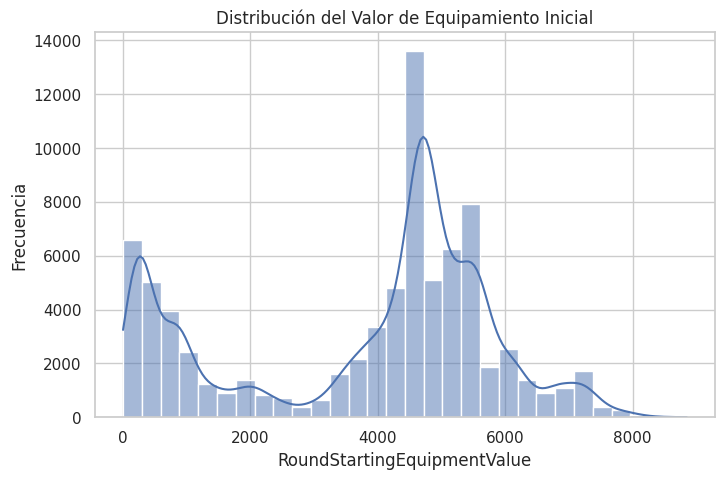

In [ ]:
# Histograma del valor de equipamiento inicial
plt.figure(figsize=(8,5))
sns.histplot(df['RoundStartingEquipmentValue'], bins=30, kde=True)
plt.title('Distribución del Valor de Equipamiento Inicial')
plt.xlabel('RoundStartingEquipmentValue')
plt.ylabel('Frecuencia')
plt.show()


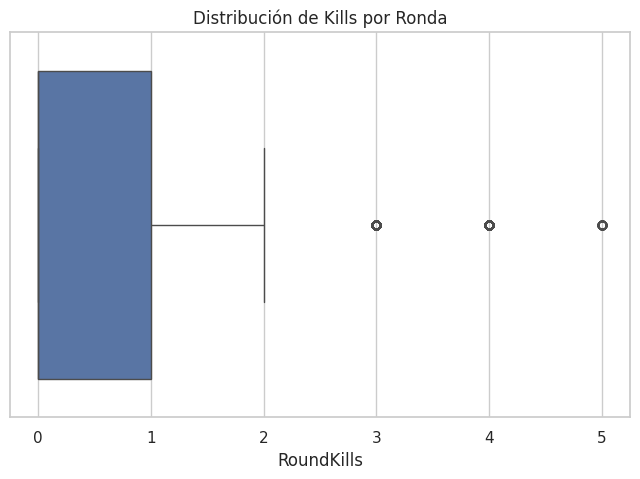

In [ ]:
# Boxplot kills por ronda
plt.figure(figsize=(8,5))
sns.boxplot(x=df['RoundKills'])
plt.title('Distribución de Kills por Ronda')
plt.show()


In [ ]:
# Creamos una copia segura
df_corr = df.copy()

# Convertimos columnas booleanas a 1 y 0
bool_cols = df_corr.select_dtypes(include=['bool']).columns
df_corr[bool_cols] = df_corr[bool_cols].astype(int)

# Convertimos RoundWinner a numérico: CT = 0, T = 1
df_corr['RoundWinner'] = df_corr['RoundWinner'].map({'CT': 0, 'T': 1})

# Eliminamos los NaN si había 'None' u otros valores
df_corr = df_corr.dropna(subset=['RoundWinner'])


In [16]:
correlation = df_corr.corr(numeric_only=True)  # Calcula la matriz de correlación solo para columnas numéricas
print(correlation.head())  # Muestra las primeras filas para verificar que los valores son correctos

#Calcula qué tan relacionados están tus datos numéricos entre sí.

                Unnamed: 0  InternalTeamId   MatchId   RoundId  RoundWinner  \
Unnamed: 0        1.000000        0.000095  0.999979  0.003375          NaN   
InternalTeamId    0.000095        1.000000  0.000027 -0.000008          NaN   
MatchId           0.999979        0.000027  1.000000  0.001476          NaN   
RoundId           0.003375       -0.000008  0.001476  1.000000          NaN   
RoundWinner            NaN             NaN       NaN       NaN          NaN   

                Survived  AbnormalMatch  RLethalGrenadesThrown  \
Unnamed: 0     -0.003245            NaN               0.002911   
InternalTeamId  0.044872            NaN               0.039136   
MatchId        -0.003239            NaN               0.003009   
RoundId        -0.015361            NaN               0.065327   
RoundWinner          NaN            NaN                    NaN   

                RNonLethalGrenadesThrown  PrimaryAssaultRifle  ...  \
Unnamed: 0                     -0.009307            -0.027

In [17]:
correlation = df_corr.corr(numeric_only=True)


In [18]:
correlation = df_corr.corr(numeric_only=True)
print(correlation)
#Calcula qué tan relacionados están tus datos numéricos entre sí.

                             Unnamed: 0  InternalTeamId   MatchId   RoundId  \
Unnamed: 0                     1.000000        0.000095  0.999979  0.003375   
InternalTeamId                 0.000095        1.000000  0.000027 -0.000008   
MatchId                        0.999979        0.000027  1.000000  0.001476   
RoundId                        0.003375       -0.000008  0.001476  1.000000   
RoundWinner                         NaN             NaN       NaN       NaN   
Survived                      -0.003245        0.044872 -0.003239 -0.015361   
AbnormalMatch                       NaN             NaN       NaN       NaN   
RLethalGrenadesThrown          0.002911        0.039136  0.003009  0.065327   
RNonLethalGrenadesThrown      -0.009307       -0.005408 -0.009234  0.073314   
PrimaryAssaultRifle           -0.027305        0.001750 -0.027313  0.085892   
PrimarySniperRifle             0.043187        0.042205  0.043119  0.026291   
PrimaryHeavy                   0.003781        0.006

In [19]:
# Ordenamos por la correlación absoluta con RoundKills
roundkills_corr = correlation['RoundKills'].abs().sort_values(ascending=False)

print(roundkills_corr)


RoundKills                     1.000000
RoundHeadshots                 0.679179
RoundFlankKills                0.391406
Survived                       0.331619
PrimaryPistol                  0.195501
MatchKills                     0.183402
RoundStartingEquipmentValue    0.172141
TeamStartingEquipmentValue     0.168600
RLethalGrenadesThrown          0.162721
MatchHeadshots                 0.152600
RNonLethalGrenadesThrown       0.148663
PrimaryAssaultRifle            0.127903
MatchFlankKills                0.115988
PrimarySniperRifle             0.072187
InternalTeamId                 0.033085
RoundAssists                   0.021482
MatchAssists                   0.019540
PrimarySMG                     0.018592
RoundId                        0.009134
Unnamed: 0                     0.003284
MatchId                        0.003271
PrimaryHeavy                   0.001692
RoundWinner                         NaN
AbnormalMatch                       NaN
Name: RoundKills, dtype: float64


In [21]:
print(df_corr.shape)
print(df_corr.head())


(79157, 30)
   Unnamed: 0         Map       Team  InternalTeamId  MatchId  RoundId  \
0         600  de_inferno  Terrorist               1        4        1   
1         601  de_inferno  Terrorist               1        4        1   
2         602  de_inferno  Terrorist               1        4        1   
3         603  de_inferno  Terrorist               1        4        1   
4         604  de_inferno  Terrorist               1        4        1   

   RoundWinner MatchWinner  Survived  AbnormalMatch  ... RoundKills  \
0         -1.0        True         0              0  ...          0   
1         -1.0        True         0              0  ...          0   
2         -1.0        True         0              0  ...          0   
3         -1.0        True         0              0  ...          0   
4         -1.0        True         1              0  ...          0   

  RoundAssists  RoundHeadshots  RoundFlankKills  RoundStartingEquipmentValue  \
0            0               0      

In [22]:
print(df_corr.shape)


(79157, 30)


In [23]:
print(df['RoundWinner'].isnull().sum())
print(df.shape)


0
(79157, 30)


In [24]:
df['RoundWinner'] = df['RoundWinner'].fillna(-1)


In [25]:
# Carga de nuevo tus datos originales
df_corr = df.copy()

# Convertimos columnas booleanas a 0/1 si las hay
bool_cols = df_corr.select_dtypes(include=['bool']).columns
df_corr[bool_cols] = df_corr[bool_cols].astype(int)

# Transformamos RoundWinner a 0 y 1 (CT y T)
df_corr['RoundWinner'] = df_corr['RoundWinner'].map({'CT': 0, 'T': 1})

# Rellenamos los NaN por -1 en vez de eliminar
df_corr['RoundWinner'] = df_corr['RoundWinner'].fillna(-1)

# Ahora sí revisamos
print(df_corr.shape)
print(df_corr['RoundWinner'].unique())

#Si había valores faltantes (NaN) en RoundWinner, los rellena con -1.

#Esto es mejor que eliminarlos, porque:

#No pierdes datos.

#Luego puedes decidir cómo tratar estos -1 (por ejemplo, ignorarlos o clasificarlos como "desconocido").


(79157, 30)
[-1.]


In [26]:
print(df_corr['MatchWinner'].unique())
print(df_corr['RoundKills'].describe())
print(df_corr['TeamStartingEquipmentValue'].describe())

#"Antes de entrenar cualquier modelo de Machine Learning, es fundamental realizar una exploración de datos.
# Esto nos permite detectar problemas que podrían alterar los resultados, comprender
# mejor la lógica del juego, y preparar los datos de una manera que maximice el rendimiento de los modelos que construiremos más adelante."


[True False nan]
count    79157.000000
mean         0.671349
std          0.881798
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: RoundKills, dtype: float64
count    79157.000000
mean     18890.133532
std       9743.203024
min          0.000000
25%      10900.000000
50%      22550.000000
75%      26050.000000
max      36150.000000
Name: TeamStartingEquipmentValue, dtype: float64


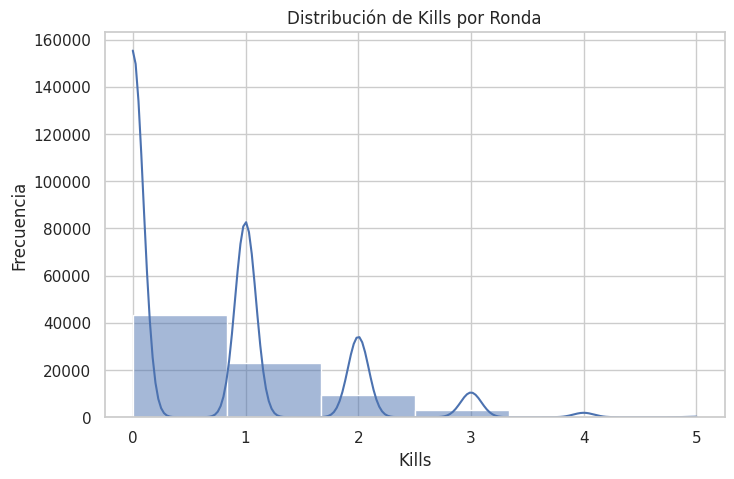

In [27]:
plt.figure(figsize=(8,5))
sns.histplot(df_corr['RoundKills'], bins=6, kde=True)
plt.title('Distribución de Kills por Ronda')
plt.xlabel('Kills')
plt.ylabel('Frecuencia')
plt.show()

#Este bloque de código genera un histograma con una curva de densidad para visualizar la distribución de los kills por ronda.
#El gráfico ayuda a ver cómo se
#comportan los jugadores en términos de kills: ¿hay muchos kills en algunas rondas?
#¿Es más común que los jugadores hagan pocos kills por ronda?


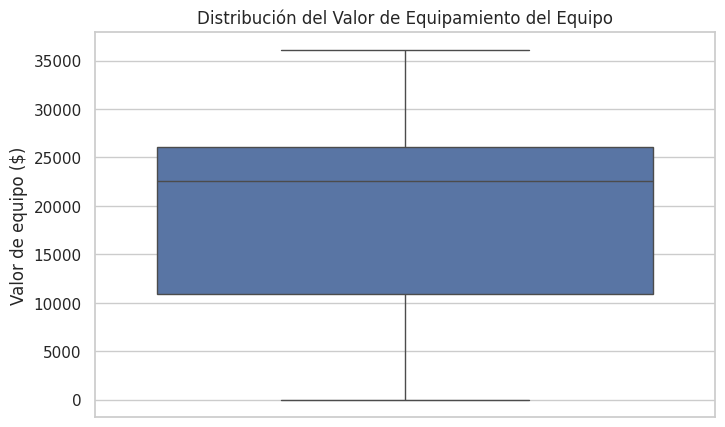

In [28]:
plt.figure(figsize=(8,5))
sns.boxplot(y='TeamStartingEquipmentValue', data=df_corr)
plt.title('Distribución del Valor de Equipamiento del Equipo')
plt.ylabel('Valor de equipo ($)')
plt.show()

#Este bloque de código genera un boxplot que muestra la distribución del valor del equipamiento inicial de cada equipo. El gráfico ayuda a visualizar:
#La mediana del valor del equipamiento.
#Los rangos intercuartiles (la caja).
#Los outliers o valores atípicos (puntos fuera de los "bigotes").
#Es útil para detectar si hay un gran desequilibrio en el valor de los equipos o si algunos equipos están muy por encima o por debajo del valor promedio.


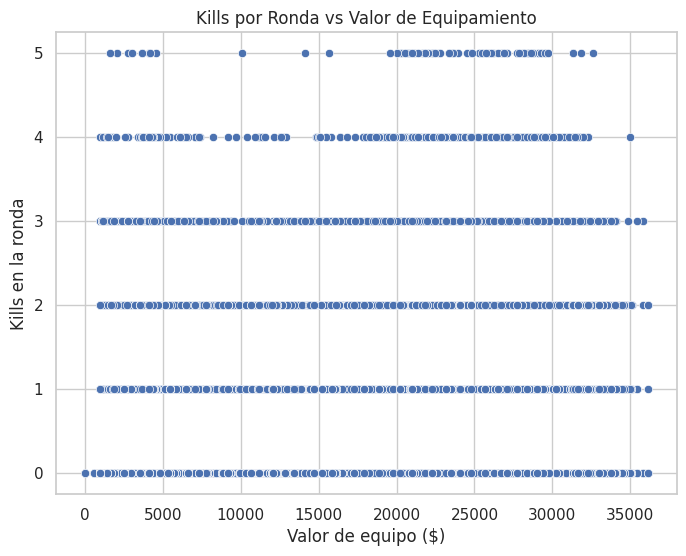

In [29]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='TeamStartingEquipmentValue', y='RoundKills', data=df_corr)
plt.title('Kills por Ronda vs Valor de Equipamiento')
plt.xlabel('Valor de equipo ($)')
plt.ylabel('Kills en la ronda')
plt.show()
#El gráfico ayuda a visualizar si existe alguna relación entre el valor del equipamiento y la cantidad de kills.
# Si ves que los puntos están agrupados o distribuidos de alguna manera en el gráfico, eso podría indicar una correlación entre estas dos variables.
# Por ejemplo, si los puntos tienden a subir de izquierda a derecha, podría indicar que a mayor equipamiento inicial, más kills en la ronda.

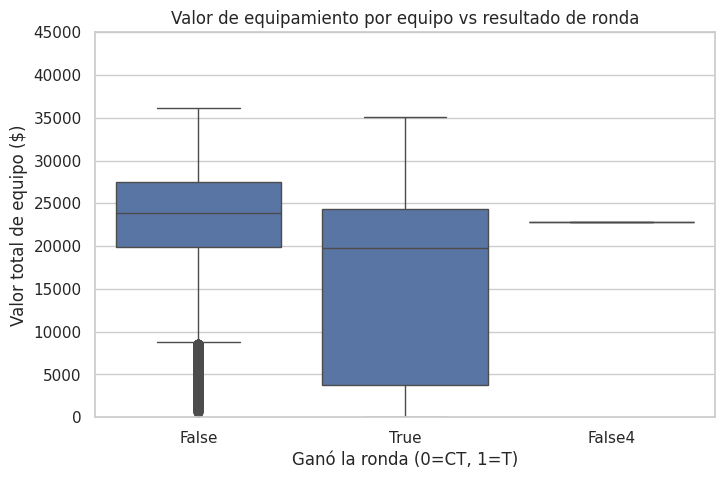

In [30]:
plt.figure(figsize=(8,5))
sns.boxplot(x='RoundWinner', y='TeamStartingEquipmentValue', data=df)
plt.ylim(0, 45000)  # Limitar el eje Y para mejor visualización
plt.title('Valor de equipamiento por equipo vs resultado de ronda')
plt.xlabel('Ganó la ronda (0=CT, 1=T)')
plt.ylabel('Valor total de equipo ($)')
plt.show()

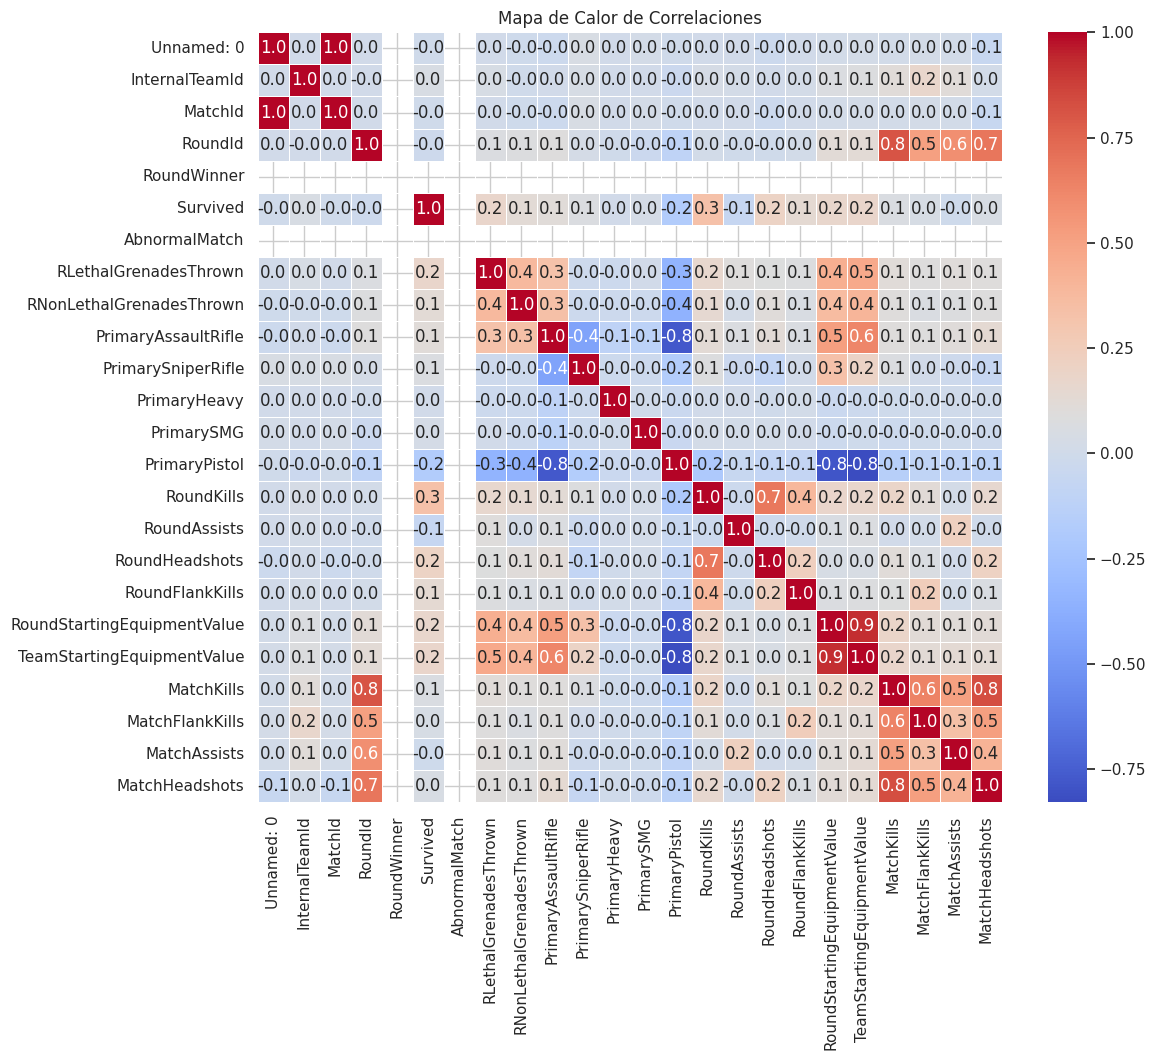

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Filtramos solo las columnas numéricas
numeric_cols = df_corr.select_dtypes(include=['float64', 'int64'])

# 2. Calculamos la matriz de correlaciones
correlation_matrix = numeric_cols.corr()

# 3. Graficamos el heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.5)  # Change fmt to ".1f"
plt.title('Mapa de Calor de Correlaciones')
plt.show()

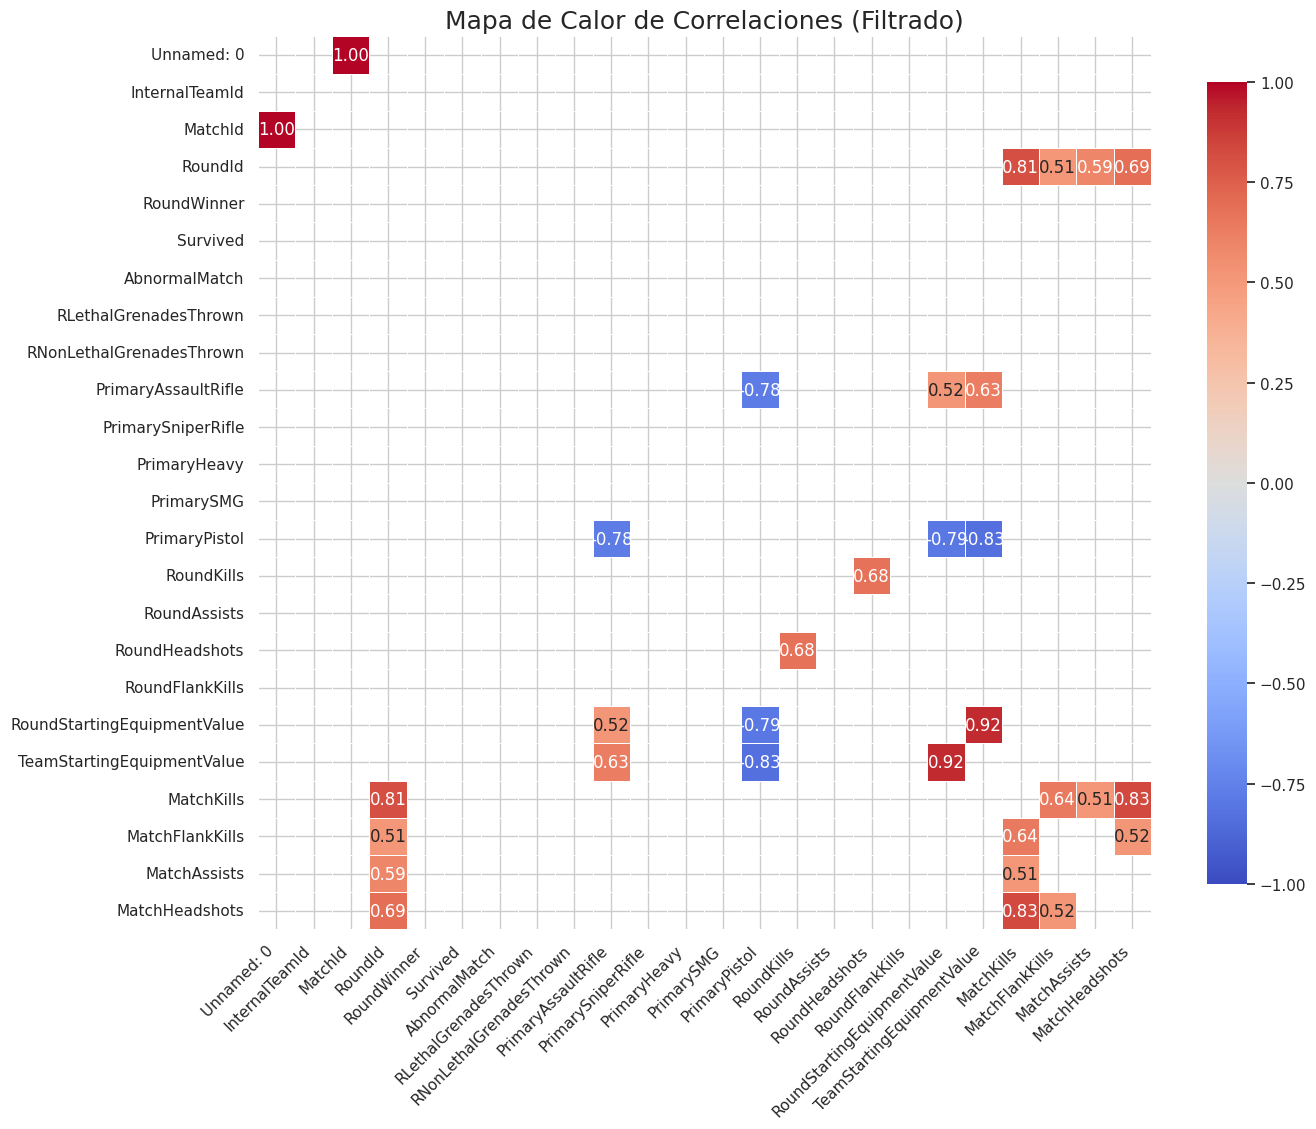

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Filtramos solo las columnas numéricas
numeric_cols = df_corr.select_dtypes(include=['float64', 'int64'])

# 2. Calculamos la matriz de correlaciones
correlation_matrix = numeric_cols.corr()

# 3. Reducimos la matriz solo a correlaciones fuertes (>0.5 o <-0.5)
mask = (correlation_matrix.abs() >= 0.5) & (correlation_matrix != 1.0)
filtered_corr = correlation_matrix.where(mask)

# 4. Graficamos el heatmap más limpio
plt.figure(figsize=(14, 12))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=-1, vmax=1, square=True, cbar_kws={"shrink": .8})
plt.title('Mapa de Calor de Correlaciones (Filtrado)', fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [33]:
import pandas as pd
import numpy as np

# 1. Obtenemos solo las columnas numéricas
numeric_cols = df_corr.select_dtypes(include=['float64', 'int64'])

# 2. Calculamos la matriz de correlaciones
correlation_matrix = numeric_cols.corr()

# 3. Deshacemos la matriz (de cuadrado a tabla de 2 columnas)
correlation_pairs = correlation_matrix.unstack()

# 4. Eliminamos las autocorrelaciones (correlación de una variable consigo misma)
correlation_pairs = correlation_pairs[correlation_pairs.index.get_level_values(0) != correlation_pairs.index.get_level_values(1)]

# 5. Eliminamos duplicados (porque A vs B es igual que B vs A)
correlation_pairs = correlation_pairs.drop_duplicates()

# 6. Ordenamos por la correlación absoluta más alta
top_10_correlations = correlation_pairs.reindex(correlation_pairs.abs().sort_values(ascending=False).index).head(10)

# 7. Mostramos en una tabla bonita
top_10_df = top_10_correlations.reset_index()
top_10_df.columns = ['Variable 1', 'Variable 2', 'Correlación']

print(top_10_df)


                    Variable 1                   Variable 2  Correlación
0                   Unnamed: 0                      MatchId     0.999979
1  RoundStartingEquipmentValue   TeamStartingEquipmentValue     0.922943
2                   MatchKills               MatchHeadshots     0.831450
3                PrimaryPistol   TeamStartingEquipmentValue    -0.828608
4                      RoundId                   MatchKills     0.807501
5                PrimaryPistol  RoundStartingEquipmentValue    -0.792876
6          PrimaryAssaultRifle                PrimaryPistol    -0.776826
7                      RoundId               MatchHeadshots     0.688221
8                   RoundKills               RoundHeadshots     0.679179
9                   MatchKills              MatchFlankKills     0.641599


<ipython-input-34-655697ee9b81>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


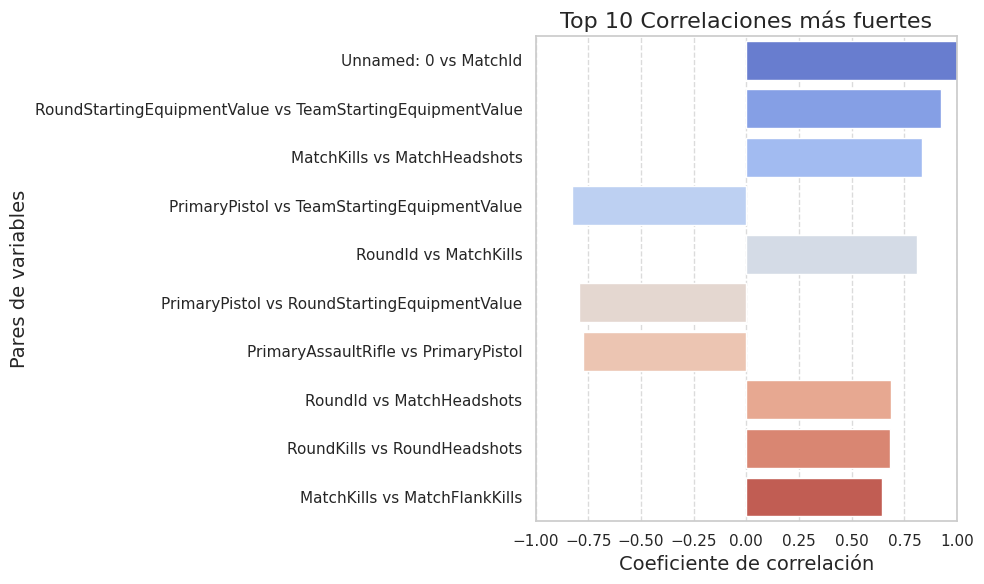

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Usamos el mismo `top_10_df` que sacamos antes

# 2. Creamos el gráfico
plt.figure(figsize=(10,6))
sns.barplot(
    data=top_10_df,
    x='Correlación',
    y=top_10_df['Variable 1'] + " vs " + top_10_df['Variable 2'],  # Combina los nombres
    palette='coolwarm'
)

# 3. Personalizamos
plt.title('Top 10 Correlaciones más fuertes', fontsize=16)
plt.xlabel('Coeficiente de correlación', fontsize=14)
plt.ylabel('Pares de variables', fontsize=14)
plt.xlim(-1, 1)  # Como la correlación siempre va de -1 a 1
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [35]:
features_clasificacion = [
    'RoundStartingEquipmentValue',   # valor del equipo al inicio de ronda
    'TeamStartingEquipmentValue',    # valor total del equipo
    'PrimaryAssaultRifle',           # booleano: lleva rifle de asalto
    'PrimarySniperRifle',            # booleano: lleva AWP u otro sniper
    'RLethalGrenadesThrown',         # uso de utilidad letal
    'RNonLethalGrenadesThrown',      # uso de flashes, smokes, etc.
    'FirstKillTime',                 # momento de la primera baja
]


In [36]:
features_regresion = [
    'RoundStartingEquipmentValue',
    'PrimaryAssaultRifle',
    'PrimarySniperRifle',
    'FirstKillTime',
    'TravelledDistance',  # qué tanto se movió (agresividad)
    'Survived',           # si sobrevivió, es probable que haya hecho más
]


In [37]:
# Features para clasificación
X_clas = df_corr[features_clasificacion]
y_clas = df_corr['RoundWinner']  # 0 = CT, 1 = T

# Features para regresión
X_reg = df_corr[features_regresion]
y_reg = df_corr['RoundKills']


In [38]:
print(df_corr.head())


   Unnamed: 0         Map       Team  InternalTeamId  MatchId  RoundId  \
0         600  de_inferno  Terrorist               1        4        1   
1         601  de_inferno  Terrorist               1        4        1   
2         602  de_inferno  Terrorist               1        4        1   
3         603  de_inferno  Terrorist               1        4        1   
4         604  de_inferno  Terrorist               1        4        1   

   RoundWinner MatchWinner  Survived  AbnormalMatch  ... RoundKills  \
0         -1.0        True         0              0  ...          0   
1         -1.0        True         0              0  ...          0   
2         -1.0        True         0              0  ...          0   
3         -1.0        True         0              0  ...          0   
4         -1.0        True         1              0  ...          0   

  RoundAssists  RoundHeadshots  RoundFlankKills  RoundStartingEquipmentValue  \
0            0               0                0 

In [42]:
print(df_corr.head())


   Unnamed: 0         Map       Team  InternalTeamId  MatchId  RoundId  \
0         600  de_inferno  Terrorist               1        4        1   
1         601  de_inferno  Terrorist               1        4        1   
2         602  de_inferno  Terrorist               1        4        1   
3         603  de_inferno  Terrorist               1        4        1   
4         604  de_inferno  Terrorist               1        4        1   

   RoundWinner MatchWinner  Survived  AbnormalMatch  ... RoundKills  \
0           -1        True         0              0  ...          0   
1           -1        True         0              0  ...          0   
2           -1        True         0              0  ...          0   
3           -1        True         0              0  ...          0   
4           -1        True         1              0  ...          0   

  RoundAssists  RoundHeadshots  RoundFlankKills  RoundStartingEquipmentValue  \
0            0               0                0 

In [43]:
print(df_corr['RoundWinner'].unique())  # Revisa los valores únicos de 'RoundWinner'
print(df_corr['TeamStartingEquipmentValue'].describe())  # Revisa estadísticas básicas de 'TeamStartingEquipmentValue'


[-1]
count    79157.000000
mean     18890.133532
std       9743.203024
min          0.000000
25%      10900.000000
50%      22550.000000
75%      26050.000000
max      36150.000000
Name: TeamStartingEquipmentValue, dtype: float64


In [44]:
df_corr['RoundWinner'] = df_corr['RoundWinner'].fillna(0)  # Reemplaza nulos con 0


In [46]:
print(df_corr.head())  # Muestra las primeras filas del DataFrame
print(df_corr.shape)  # Muestra las dimensiones del DataFrame (filas, columnas)


   Unnamed: 0         Map       Team  InternalTeamId  MatchId  RoundId  \
0         600  de_inferno  Terrorist               1        4        1   
1         601  de_inferno  Terrorist               1        4        1   
2         602  de_inferno  Terrorist               1        4        1   
3         603  de_inferno  Terrorist               1        4        1   
4         604  de_inferno  Terrorist               1        4        1   

   RoundWinner MatchWinner  Survived  AbnormalMatch  ... RoundKills  \
0           -1        True         0              0  ...          0   
1           -1        True         0              0  ...          0   
2           -1        True         0              0  ...          0   
3           -1        True         0              0  ...          0   
4           -1        True         1              0  ...          0   

  RoundAssists  RoundHeadshots  RoundFlankKills  RoundStartingEquipmentValue  \
0            0               0                0 

In [52]:
# Creamos una nueva columna categórica
df['UsedAssaultRifle'] = df['PrimaryAssaultRifle'].apply(lambda x: 1 if x > 0.5 else 0)


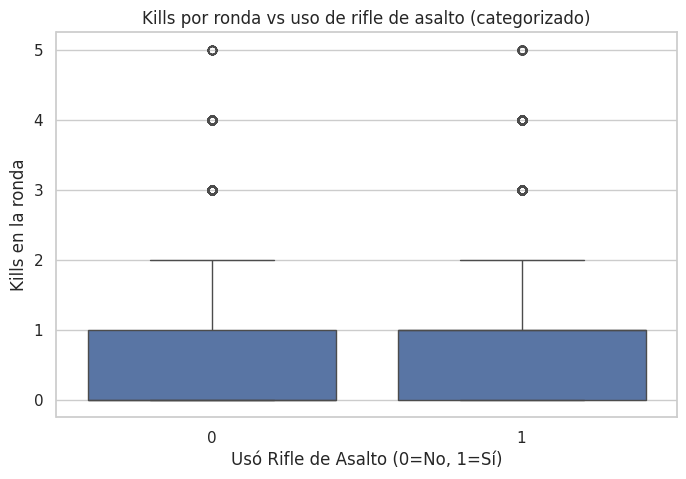

In [53]:
plt.figure(figsize=(8,5))
sns.boxplot(x='UsedAssaultRifle', y='RoundKills', data=df)
plt.title('Kills por ronda vs uso de rifle de asalto (categorizado)')
plt.xlabel('Usó Rifle de Asalto (0=No, 1=Sí)')
plt.ylabel('Kills en la ronda')
plt.show()
#El boxplot te ayudará a comparar la distribución de las muertes en las rondas entre los jugadores que usaron un rifle de asalto (1) y los que no lo usaron (0). Específicamente, podrás observar:
#Mediana de kills: El valor central de las muertes en cada grupo.
#Rango intercuartílico (caja): El rango en el que se encuentran el 50% de las observaciones.
#Valores atípicos: Las muertes excepcionales (si hay jugadores con un rendimiento significativamente mejor o peor que el resto).

## Fase 2: Data Understanding

In [ ]:
# Insertar cuantos bloques de código consideren necesarios

# Se recomienda obtener estadísticos descriptivos para apoyar hipótesis inferenciales.
# Reconocer la naturaleza de los datos y como tratarlos en etapas posteriores y dar ideas de como se podría transformar.
# Identificar MissingValues, outliers, medidas de posición, medidas de dispersión etc.

## Fase 3: Data Preparation

In [ ]:
# Insertar cuantos bloques de código consideren necesarios

# Se recomienda considerar todas las transformaciones necesarias para obtener la data lo más limpia posible.
# Realizar tratamiento a todos los datos que consideren necesarios.